<a href="https://colab.research.google.com/github/aaronjoju07/NNDL/blob/main/2347201_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.1 Write a code to convert the image from the given color model to different color models.**

**3.2 Include different types of noises in the input image with various densities and apply linear and non-linear spatial filters to the noise contaminated image with different mask size.**

**Objective:**
The lab objectives include exploring various color models (RGB, CMYK, LAB), simulating common noise types (Gaussian, Salt & Pepper, Speckle), and applying linear and non-linear filters for noise reduction. Students are expected to analyze filter performance with different mask sizes while enhancing their programming skills in Python and OpenCV, and developing effective reporting and presentation skills.

**Scenario:**
You are the lead image processing engineer at TechPrint, a company that specializes in producing brochures and posters for technology companies. You are tasked with preparing a product image of a NEW LAPTOP for a high-quality print campaign. The image needs to be converted to various color models used in professional printing and be made noise-free to ensure perfect color reproduction.

**Task breakdown :**

# Convert an RGB image to multiple color models (CMYK, HSV, LAB, YUV, Grayscale)

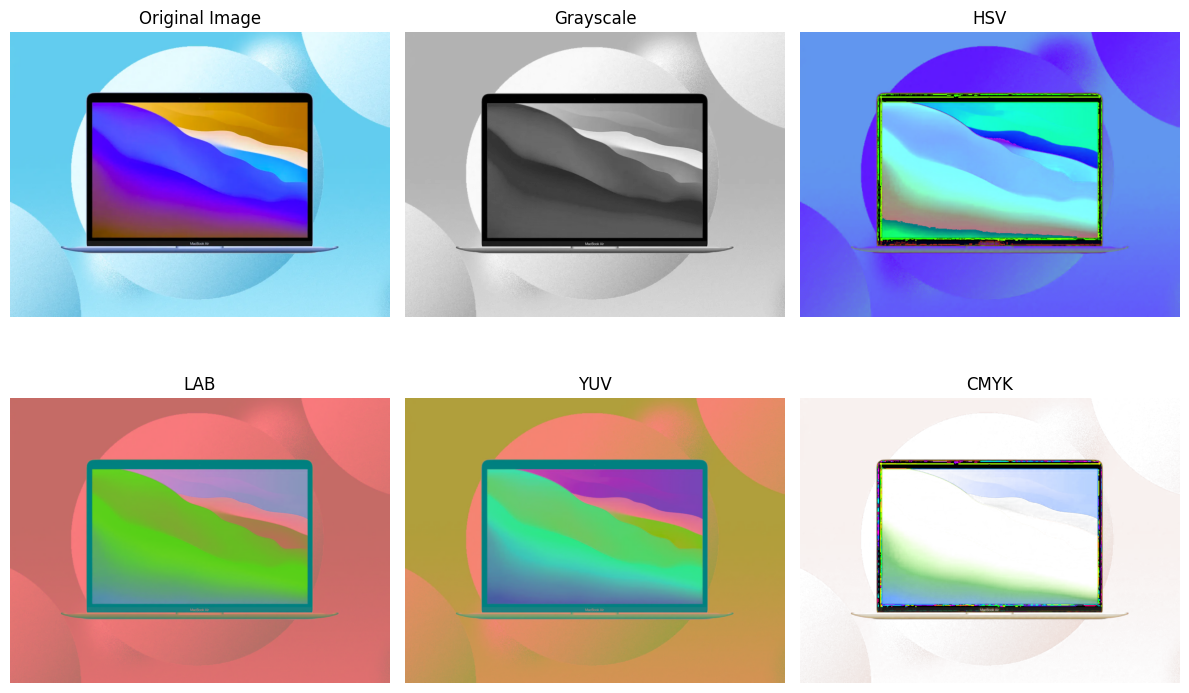

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the RGB image
image = cv2.imread('/content/drive/MyDrive/CV.Computer Vision /assets/macbook.png')

# BGR
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Grayscale
gray_image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# HSV
hsv_image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# LAB
lab_image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2LAB)

# YUV
yuv_image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# Function to convert RGB to CMYK
def rgb_to_cmyk(rgb):
    r, g, b = rgb / 255.0
    k = 1 - max(r, g, b)
    c = (1 - r - k) / (1 - k) if k < 1 else 0
    m = (1 - g - k) / (1 - k) if k < 1 else 0
    y = (1 - b - k) / (1 - k) if k < 1 else 0
    return np.array([c, m, y, k])

# Apply conversion for each pixel
height, width = image.shape[:2]
cmyk_image = np.zeros((height, width, 4), dtype=np.float32)

for i in range(height):
    for j in range(width):
        cmyk_image[i, j] = rgb_to_cmyk(image[i, j])

# Display images using matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(232)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(233)
plt.imshow(hsv_image)
plt.title('HSV')
plt.axis('off')

plt.subplot(234)
plt.imshow(lab_image)
plt.title('LAB')
plt.axis('off')

plt.subplot(235)
plt.imshow(yuv_image)
plt.title('YUV')
plt.axis('off')

plt.subplot(236)
# Normalize CMYK for display
cmyk_display = (cmyk_image * 255).astype(np.uint8)
plt.imshow(cmyk_display)
plt.title('CMYK')
plt.axis('off')

plt.tight_layout()
plt.show()

# Add Noise: Introduce Gaussian, Salt & Pepper, poisons and Speckle noise with different densities.

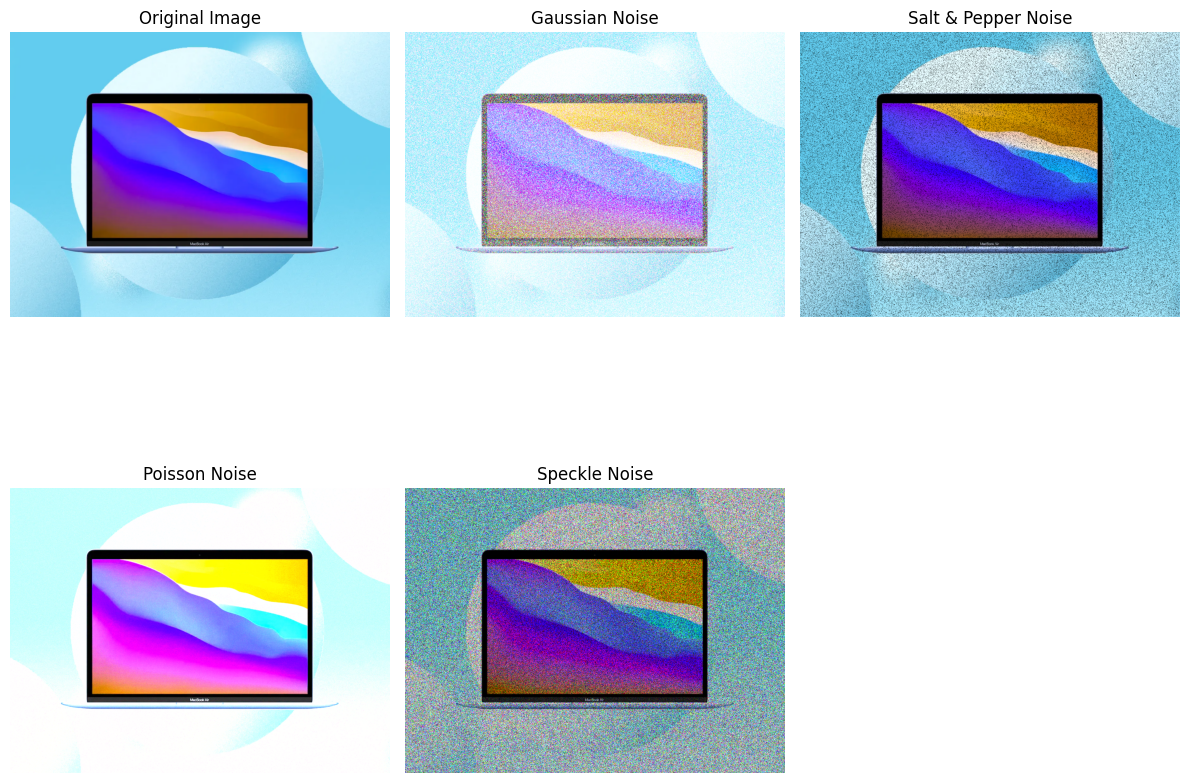

In [10]:
# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, sigma=25):
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype('uint8')
    noisy_image = cv2.add(image, gaussian_noise)
    return noisy_image

# Function to add Salt & Pepper noise
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = np.copy(image)
    total_pixels = image.size

    # Salt noise
    num_salt = np.ceil(salt_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 1  # Set to white

    # Pepper noise
    num_pepper = np.ceil(pepper_prob * total_pixels)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0  # Set to black

    return noisy_image

# Function to add Poisson noise
def add_poisson_noise(image):
    noise = np.random.poisson(image).astype('uint8')
    noisy_image = cv2.add(image, noise)
    return noisy_image

# Function to add Speckle noise
def add_speckle_noise(image):
    gauss = np.random.normal(0, 1, image.shape).astype('float32')
    noisy_image = image + image * gauss
    return np.clip(noisy_image, 0, 255).astype('uint8')

# Adding noise to the image
gaussian_noisy_image = add_gaussian_noise(image)
salt_and_pepper_noisy_image = add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02)
poisson_noisy_image = add_poisson_noise(image)
speckle_noisy_image = add_speckle_noise(image)

plt.figure(figsize=(12, 10))

plt.subplot(231)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(232)
plt.imshow(gaussian_noisy_image)
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(233)
plt.imshow(salt_and_pepper_noisy_image)
plt.title('Salt & Pepper Noise')
plt.axis('off')

plt.subplot(234)
plt.imshow(poisson_noisy_image)
plt.title('Poisson Noise')
plt.axis('off')

plt.subplot(235)
plt.imshow(speckle_noisy_image)
plt.title('Speckle Noise')
plt.axis('off')

plt.tight_layout()
plt.show()

# Apply Filters: Use linear (box,Gaussian) and non-linear filters (Minimum, Maximum,Median, Bilateral) with varying mask sizes to remove noise.

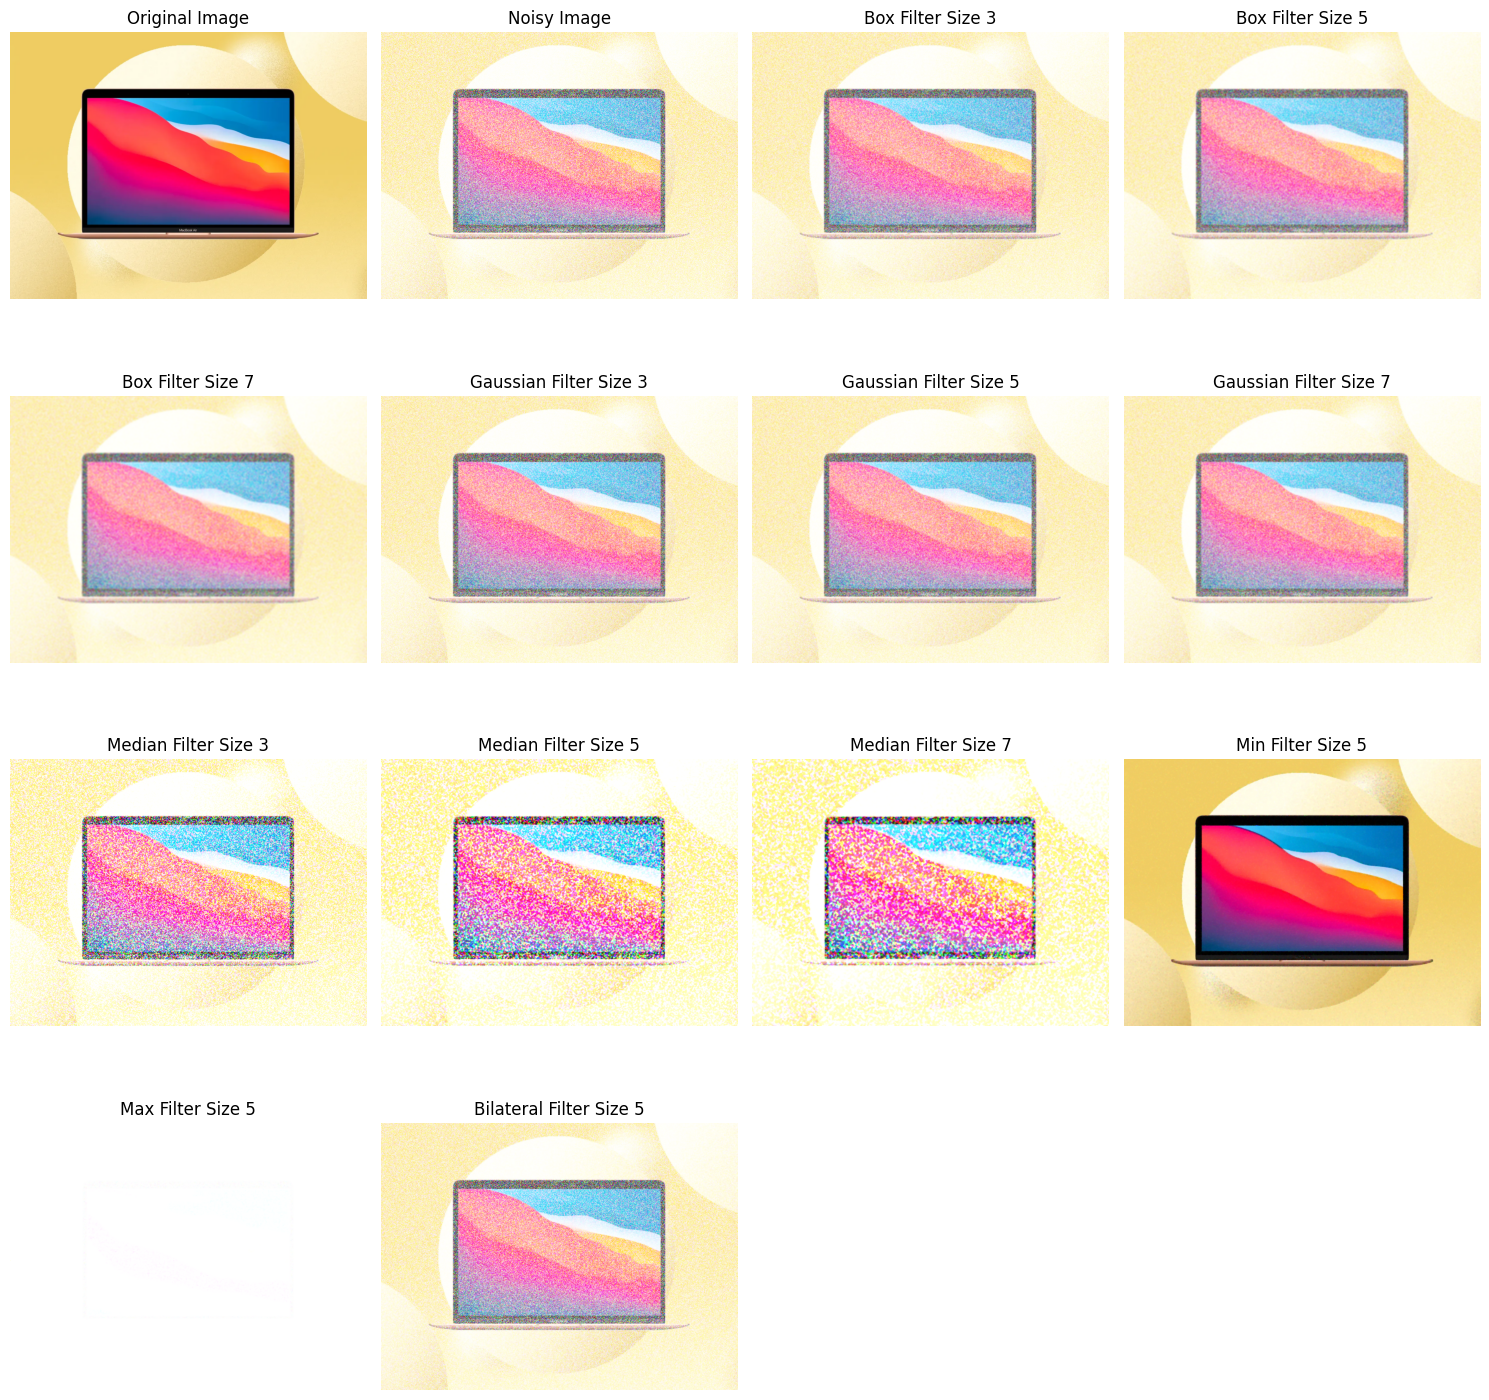

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, sigma=25):
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype('uint8')
    noisy_image = cv2.add(image, gaussian_noise)
    return noisy_image

# Add Gaussian noise to the image

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
noisy_image = add_gaussian_noise(image_rgb)

# Define different mask sizes
mask_sizes = [3, 5, 7]

# Initialize lists to store filtered images
box_filtered_images = []
gaussian_filtered_images = []
min_filtered_images = []
max_filtered_images = []
median_filtered_images = []
bilateral_filtered_images = []

# Apply different filters with varying mask sizes
for size in mask_sizes:
    # Linear filters
    box_filtered = cv2.boxFilter(noisy_image, -1, (size, size))
    gaussian_filtered = cv2.GaussianBlur(noisy_image, (size, size), 0)

    # Non-linear filters
    min_filtered = cv2.erode(noisy_image, np.ones((size, size), np.uint8))
    max_filtered = cv2.dilate(noisy_image, np.ones((size, size), np.uint8))
    median_filtered = cv2.medianBlur(noisy_image, size)
    bilateral_filtered = cv2.bilateralFilter(noisy_image, size, 75, 75)

    # Append results
    box_filtered_images.append(box_filtered)
    gaussian_filtered_images.append(gaussian_filtered)
    min_filtered_images.append(min_filtered)
    max_filtered_images.append(max_filtered)
    median_filtered_images.append(median_filtered)
    bilateral_filtered_images.append(bilateral_filtered)

# Display the original and filtered images
plt.figure(figsize=(15, 15))

# Display original and noisy images
plt.subplot(4, 4, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(4, 4, 2)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')

# Display Box Filtered Images
for i, size in enumerate(mask_sizes):
    plt.subplot(4, 4, 3 + i)
    plt.imshow(box_filtered_images[i])
    plt.title(f'Box Filter Size {size}')
    plt.axis('off')

# Display Gaussian Filtered Images
for i, size in enumerate(mask_sizes):
    plt.subplot(4, 4, 6 + i)
    plt.imshow(gaussian_filtered_images[i])
    plt.title(f'Gaussian Filter Size {size}')
    plt.axis('off')

# Display Median Filtered Images
for i, size in enumerate(mask_sizes):
    plt.subplot(4, 4, 9 + i)
    plt.imshow(median_filtered_images[i])
    plt.title(f'Median Filter Size {size}')
    plt.axis('off')

# Display Minimum Filter, Maximum Filter, and Bilateral Filter
plt.subplot(4, 4, 12)
plt.imshow(min_filtered_images[1])  # Show one of the sizes for min filter
plt.title('Min Filter Size 5')
plt.axis('off')

plt.subplot(4, 4, 13)
plt.imshow(max_filtered_images[1])  # Show one of the sizes for max filter
plt.title('Max Filter Size 5')
plt.axis('off')

plt.subplot(4, 4, 14)
plt.imshow(bilateral_filtered_images[1])  # Show one of the sizes for bilateral filter
plt.title('Bilateral Filter Size 5')
plt.axis('off')

plt.tight_layout()
plt.show()

# Analyze: Compare the performance of filters in terms of noise reduction and image quality.

### **Performance Analysis of Filters: Noise Reduction and Image Quality**

---

#### **Box Filter:**
- **Noise Reduction:** The box filter averages pixel values, effectively reducing noise in areas with uniform color. However, it lacks precision in complex areas, causing over-smoothing.
- **Image Quality:** While noise is reduced, the filter introduces significant blurring and edge degradation, making it unsuitable for preserving image sharpness and details.

#### **Gaussian Filter:**
- **Noise Reduction:** The Gaussian filter offers better noise reduction than the box filter by applying a weighted averaging. It performs well on smoother regions but may blur edges.
- **Image Quality:** Compared to the box filter, it maintains better detail, especially at edges. However, some fine details are lost due to the inherent smoothing effect of the Gaussian kernel.

#### **Median Filter:**
- **Noise Reduction:** Particularly effective in removing salt and pepper noise, the median filter excels in isolating and removing sharp, distinct noise pixels without affecting edges.
- **Image Quality:** The median filter preserves edges well and reduces noise effectively, providing superior image quality compared to linear filters like box or Gaussian.

#### **Minimum Filter:**
- **Noise Reduction:** Primarily reduces bright pixel noise, making it effective for handling specific noise types.
- **Image Quality:** Tends to introduce dark artifacts, degrading image quality by creating unwanted shadows or spots.

#### **Maximum Filter:**
- **Noise Reduction:** Effective at removing dark pixel noise, but its performance is very task-specific.
- **Image Quality:** Similar to the minimum filter, it can introduce bright artifacts, negatively affecting the image quality.

#### **Bilateral Filter:**
- **Noise Reduction:** The bilateral filter is highly efficient at reducing noise while preserving edges and fine details. It smooths the image in uniform areas but retains sharpness along edges.
- **Image Quality:** It strikes an excellent balance between noise reduction and detail preservation, making it ideal for tasks where both are important, such as high-quality imaging.

---

### **Conclusion:**
The **median filter** and **bilateral filter** stand out as the top performers in terms of noise reduction and image quality.

- **Median filter:** Excellent for removing salt and pepper noise without blurring, preserving edges and fine details.
- **Bilateral filter:** The most versatile, providing strong noise reduction while maintaining image sharpness and edge integrity across various noise types.

On the other hand, the **box** and **Gaussian filters** are less effective for applications requiring high detail, and **minimum/maximum filters** introduce artifacts that reduce overall image quality. Depending on the specific requirements of noise reduction and detail preservation, the median and bilateral filters are recommended for high-quality results.

# Report: Summarize the importance of color models, noise impact, and the effectiveness of filters for high-quality printing and digital display.


---

**Importance of Color Models:**

- **CMYK:** Crucial for printing, ensuring accurate color reproduction in physical media using cyan, magenta, yellow, and black.
- **HSV:** Aligned with human color perception, making it easier for image editing and adjustments.
- **LAB:** Separates luminance from color, ideal for precise color manipulation across varying lighting conditions.
- **YUV:** Used in video compression, separating brightness from color for efficient data compression.
- **Grayscale:** Simplifies images by focusing on luminance, reducing complexity where color isn’t essential.

**Impact of Noise:**

- **Gaussian Noise:** Reduces image quality by obscuring fine details, common in low-light conditions.
- **Salt and Pepper Noise:** Random black and white pixels that significantly disrupt clarity.
- **Poisson Noise:** Low-light noise affecting pixel intensity, requiring advanced filtering.
- **Speckle Noise:** Grainy artifacts, challenging to remove without losing detail, common in radar/medical imaging.

**Effectiveness of Filters:**

- **Box Filter:** Reduces noise but causes blurriness; not ideal for high-quality output.
- **Gaussian Filter:** Reduces noise while maintaining some detail, though edges may soften.
- **Median Filter:** Best for salt and pepper noise, preserving edges and fine details.
- **Min/Max Filters:** Target specific noise types but can create artifacts.
- **Bilateral Filter:** Effective for both noise reduction and edge preservation, perfect for high-quality images.

---
